In [12]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt

from qiskit import Aer
from tqdm.notebook import tqdm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=4, suppress=None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Iris

### Load Data

In [13]:
iris = load_iris()

x = iris.data
y = iris.target

x = x[y != 2]
y = y[y != 2].reshape(-1,1)
y = scaler(y, a=0, b=1)

print(x.shape, y.shape)

(100, 4) (100, 1)


In [14]:
x_dnn = scaler(x, mode="standard")
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)

  0%|          | 0/10 [00:00<?, ?it/s]

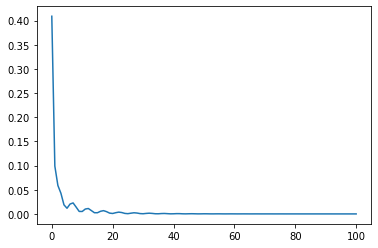

[0.4088561484389508, 0.09905650009484464, 0.05896811635646364, 0.04280552760292202, 0.01885665931155531, 0.011847538186250848, 0.020555441336601858, 0.02284766678430207, 0.01421652297730136, 0.00527852646397564, 0.005207225542702071, 0.010211194760332984, 0.011316968694972538, 0.007045048358520283, 0.002618602930343349, 0.0025660008369898235, 0.0055463937957117284, 0.006886880236343731, 0.004799347201113939, 0.0017835280567367932, 0.0010411682179334034, 0.002632961433317595, 0.0038399063569411495, 0.0029663779501476594, 0.001190410988906998, 0.0006504218863263473, 0.001646228531432231, 0.0024824560604257443, 0.001953645565838279, 0.0008176127144065531, 0.0005086132426224087, 0.0011586818231700516, 0.0016135389785598526, 0.0011839637065498918, 0.0004932221909069124, 0.00043016091192086284, 0.0008858220322342979, 0.0010505740705804537, 0.0006664478225248549, 0.0003058792313050703, 0.00042200038511222804, 0.0007104730444080326, 0.0006718771370170037, 0.00037486388156007425, 0.000263672964

In [15]:
np.random.seed(42)

dnn_list = []
for i in tqdm(range(10)):
    dnn = sequential_dnn(dim = [4, 5, 1])
    dnn.train(x_dnn, y, epochs = 100)
    dnn_list.append(dnn)
    
saver(dnn_list, data_path("cancer_dnn_pca"))
plt.plot(dnn_list[0].loss)
plt.show()
print(dnn_list[0].loss)

In [16]:
np.random.seed(42)

qcn_list = []
for i in tqdm(range(1)):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [4, 4, 1],
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         shots=0)
    
    qcn.train(x_qcn, y, epochs=100, verbose=True)
    qcn_list.append(qcn)

saver(qcn_list, data_path("iris_qcn"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.28318573604871766
epoch: 1, loss: 0.1522765285698429
epoch: 2, loss: 0.09595343726895728
epoch: 3, loss: 0.06323082277680558
epoch: 4, loss: 0.04430828845183041
epoch: 5, loss: 0.03330503481128719
epoch: 6, loss: 0.026322295621707147
epoch: 7, loss: 0.021088695042845173
epoch: 8, loss: 0.016867472192119887
epoch: 9, loss: 0.013740445823300522
epoch: 10, loss: 0.0117569343162878
epoch: 11, loss: 0.010586665520152977
epoch: 12, loss: 0.009711852036674245
epoch: 13, loss: 0.008816900100575419
epoch: 14, loss: 0.007891499066509322
epoch: 15, loss: 0.007061888784991951
epoch: 16, loss: 0.006429234183678883
epoch: 17, loss: 0.006009541695478943
epoch: 18, loss: 0.005750989054773796
epoch: 19, loss: 0.005576352654196618
epoch: 20, loss: 0.005416348513134848
epoch: 21, loss: 0.005226731292483672
epoch: 22, loss: 0.004994528119356326
epoch: 23, loss: 0.004737721958190141
epoch: 24, loss: 0.004498187428916299
epoch: 25, loss: 0.0043264376575969715
epoch: 26, loss: 0.00426000113

In [23]:
qcn = sequential_qnn(n_qubits = [4],
                         dim = [4, 1],
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=4),
                         shots=0)

In [24]:
qcn.train(x_qcn, y, epochs=100, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.12461200990647886
epoch: 1, loss: 0.06893472339071643
epoch: 2, loss: 0.04387625014892052
epoch: 3, loss: 0.03705505040035764
epoch: 4, loss: 0.03873863337214828
epoch: 5, loss: 0.041913811182075635
epoch: 6, loss: 0.04176556753337566
epoch: 7, loss: 0.03759378555325641
epoch: 8, loss: 0.031549816059830246
epoch: 9, loss: 0.025962449577014414
epoch: 10, loss: 0.021985406597956354
epoch: 11, loss: 0.01965583248956616
epoch: 12, loss: 0.018452497521488004
epoch: 13, loss: 0.01774813097544409
epoch: 14, loss: 0.017061692435546557
epoch: 15, loss: 0.01616405331019448
epoch: 16, loss: 0.0150656923065986
epoch: 17, loss: 0.013925337004344531
epoch: 18, loss: 0.012937290995183832
epoch: 19, loss: 0.01224292747019093
epoch: 20, loss: 0.011884969276587663
epoch: 21, loss: 0.011803723933679722
epoch: 22, loss: 0.011868044558474178
epoch: 23, loss: 0.011929187401980018
epoch: 24, loss: 0.01187534125470629
epoch: 25, loss: 0.011661815004779594
epoch: 26, loss: 0.01130771614826628

In [25]:
qcn1 = sequential_qnn(n_qubits = [4,],
                         dim = [4, 1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=4),
                         shots=0)

In [27]:
qcn1.train(x_qcn, y, epochs=100, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.270771821145492
epoch: 1, loss: 0.2399078273279585
epoch: 2, loss: 0.2145811500867437
epoch: 3, loss: 0.19934545893924432
epoch: 4, loss: 0.19024622910758737
epoch: 5, loss: 0.18300699298466608
epoch: 6, loss: 0.17704155656875536
epoch: 7, loss: 0.17285163149880683
epoch: 8, loss: 0.17051883353398778
epoch: 9, loss: 0.16959400117568588
epoch: 10, loss: 0.169556299118209
epoch: 11, loss: 0.17002532557510755
epoch: 12, loss: 0.17070677118694888
epoch: 13, loss: 0.17132160196698354
epoch: 14, loss: 0.1716019165039932
epoch: 15, loss: 0.1713447806951584
epoch: 16, loss: 0.1704811549473585
epoch: 17, loss: 0.1691137846396107
epoch: 18, loss: 0.16749794169875204
epoch: 19, loss: 0.16596806893234056
epoch: 20, loss: 0.16483379826965958
epoch: 21, loss: 0.16427658645963697
epoch: 22, loss: 0.1642828541888483
epoch: 23, loss: 0.16465030190621782
epoch: 24, loss: 0.16507932444300116
epoch: 25, loss: 0.16530442530829176
epoch: 26, loss: 0.1651863635437367
epoch: 27, loss: 0.1647